In [13]:
import pennylane as qml
import matplotlib.pyplot as plt

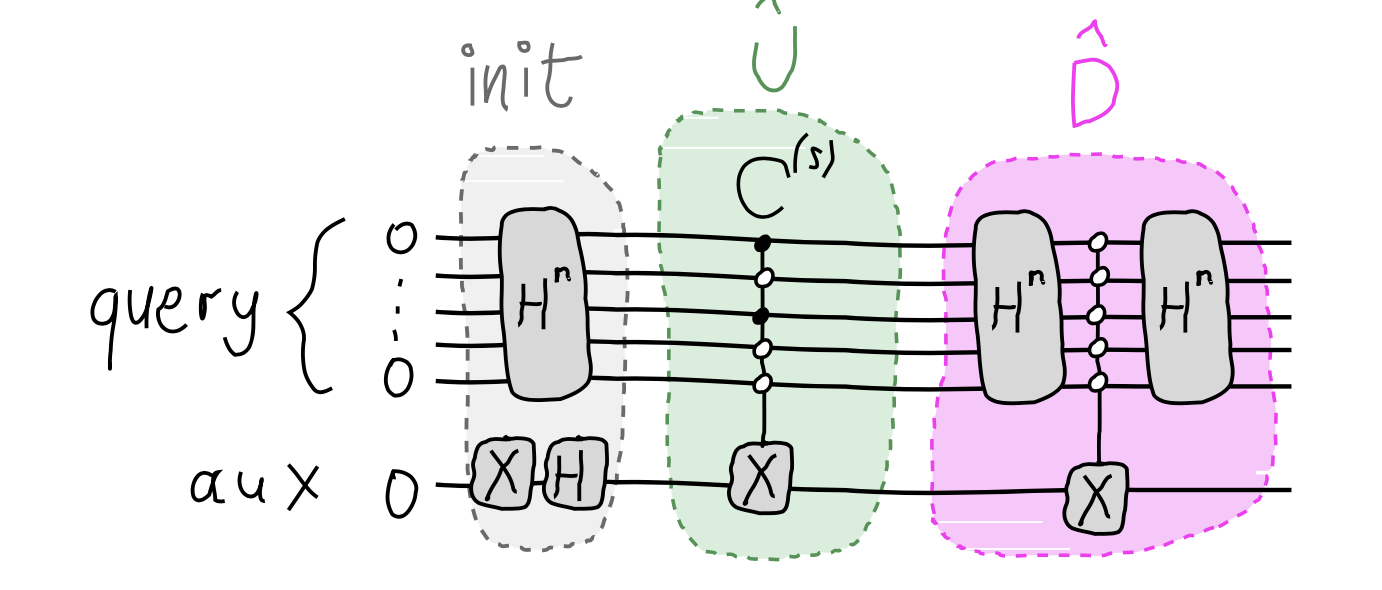

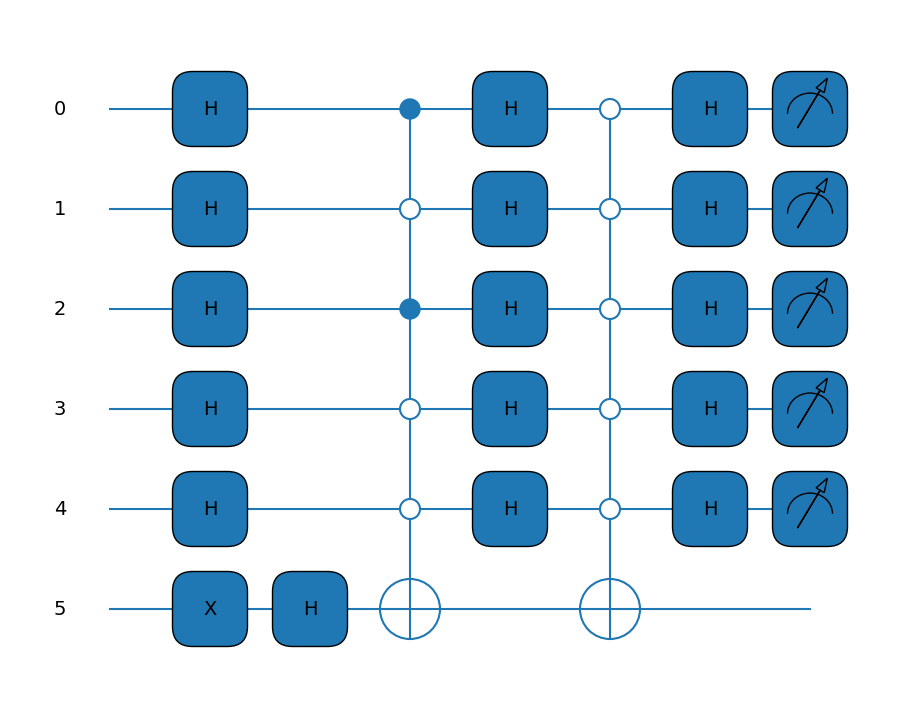

In [21]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires)

def oracle(combo):
    
    """Implementing an oracle using a multi-controlled X gate.
    
    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = ''.join(str(j) for j in combo)
    qml.MultiControlledX(control_wires=query_register,wires=aux,control_values=combo_str)

def hadamard_transform(my_wires):
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion():
    """Implementing the diffusion operator using the Hadamard transform and 
    multi-controlled X."""
    s=''
    for j in range(len(query_register)):
        s+='0'
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register,wires=aux,control_values=s)
    hadamard_transform(query_register)
@qml.qnode(dev)
def grover_circuit(combo):
    qml.PauliX(wires=aux)
    hadamard_transform(all_wires)
    oracle(combo)
    diffusion()
   
    return qml.probs(wires=query_register)
qml.drawer.use_style('default')
fig, ax = qml.draw_mpl(grover_circuit)([1,0,1,0,0])
